# Assessment Task

Using the Boston data set introduced during LAB work, apply linear regression modelling to predict the per capita crime rate using other variables in the data set. In other words, per capita crime rate is the response and the other variables are predictors.


a) Use descriptive statistics to explore the dataset.


In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Reorder colour palette
def_palette = sns.color_palette('deep')
reordered_palette = [def_palette[i] for i in [9, 1, 2, 3, 4, 5, 6, 7, 8, 0]]
sns.set_palette(reordered_palette)


In [27]:
# Shorthand to easily access columns.

# Callable function to create plots
def multi_row_plot(
    seaborn_func: object,
    data: object,
    grid: tuple = (4, 4),
    size: tuple = (25, 20),
) -> None:
    """Create a plot with default values.

    Args:
        seaborn_func (object): seaborn plot function to run.
        data (object): _description_
        grid (tuple, optional): Rows and columns. Defaults to (2, 7).
        size (tuple, optional): Width and Height. Defaults to (32, 7).

    """
    data_cols = data.columns

    # Structure plots to easily fit the data.
    fig_plot, axes = plt.subplots(grid[0], grid[1], figsize=(size[0], size[1]))
    # Flatten axes so it is easier to enumerate.
    axes = axes.flatten()

    for i, item in enumerate(data_cols):
        seaborn_func(data=data, x=item, ax=axes[i])

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')


In [6]:
# Access CSV file
boston_csv = pd.read_csv('boston-data.csv')

In [134]:
# Display and read data info and type.
boston_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [135]:
# Use describe to view summary statistics for each variable.
boston_csv.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


Plot histograms to see the distribution of the data.


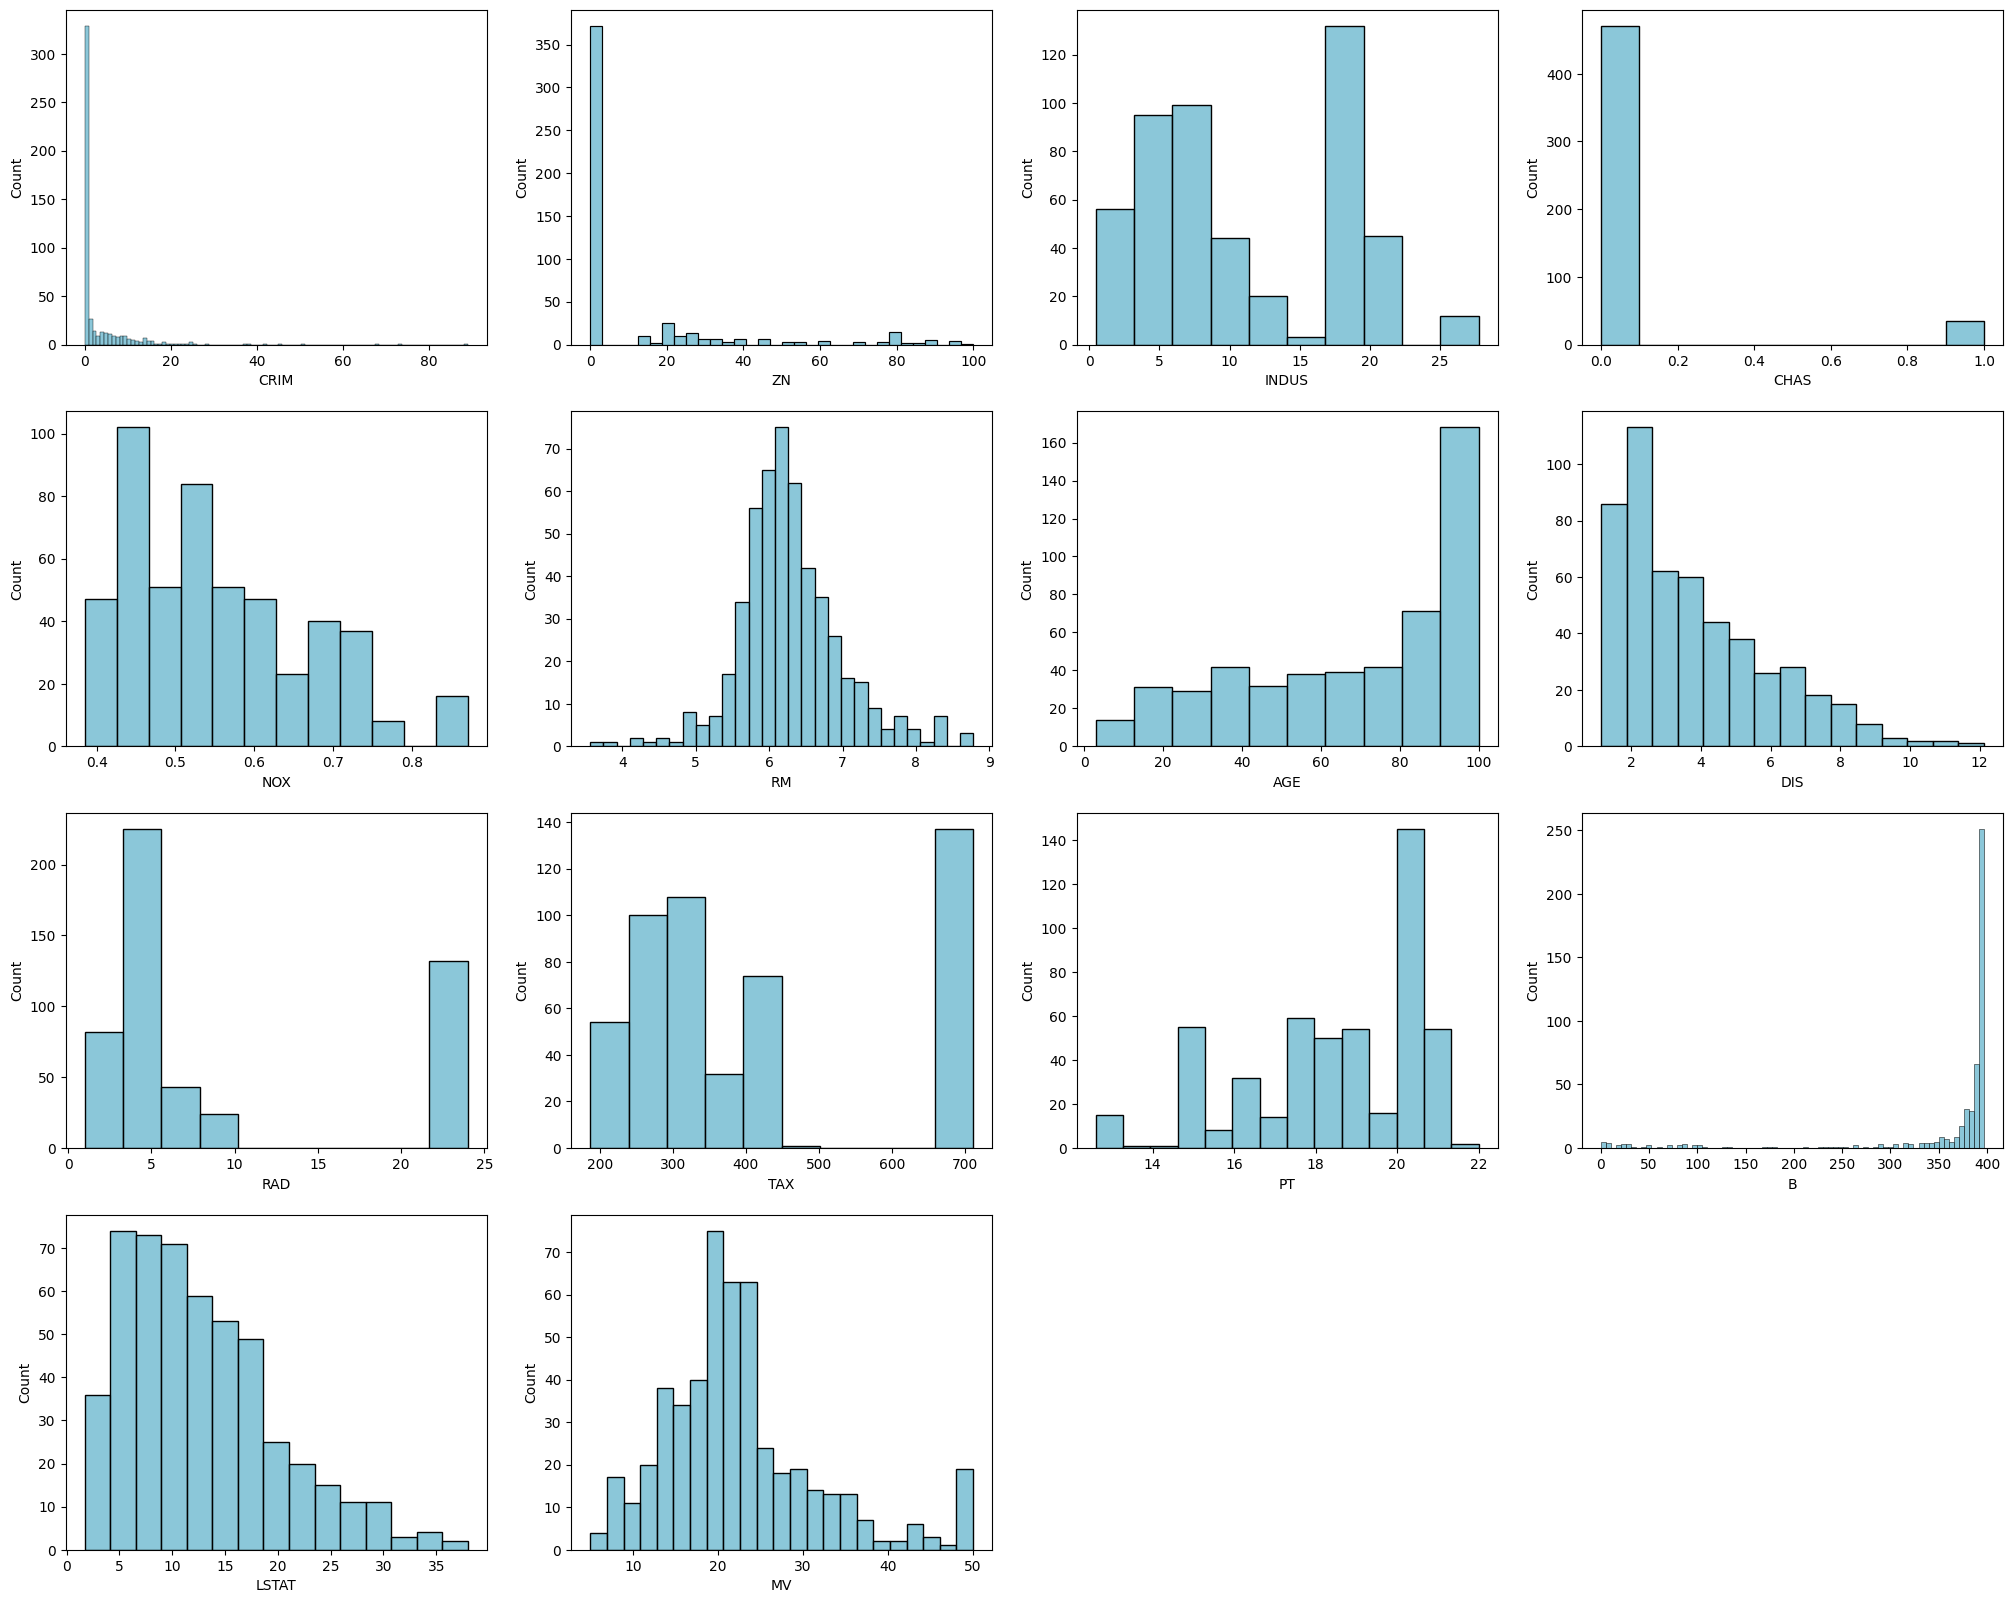

In [28]:
# Structure plots to easily fit the data.
multi_row_plot(sns.histplot, boston_csv)

Add box plots to identify outliers.


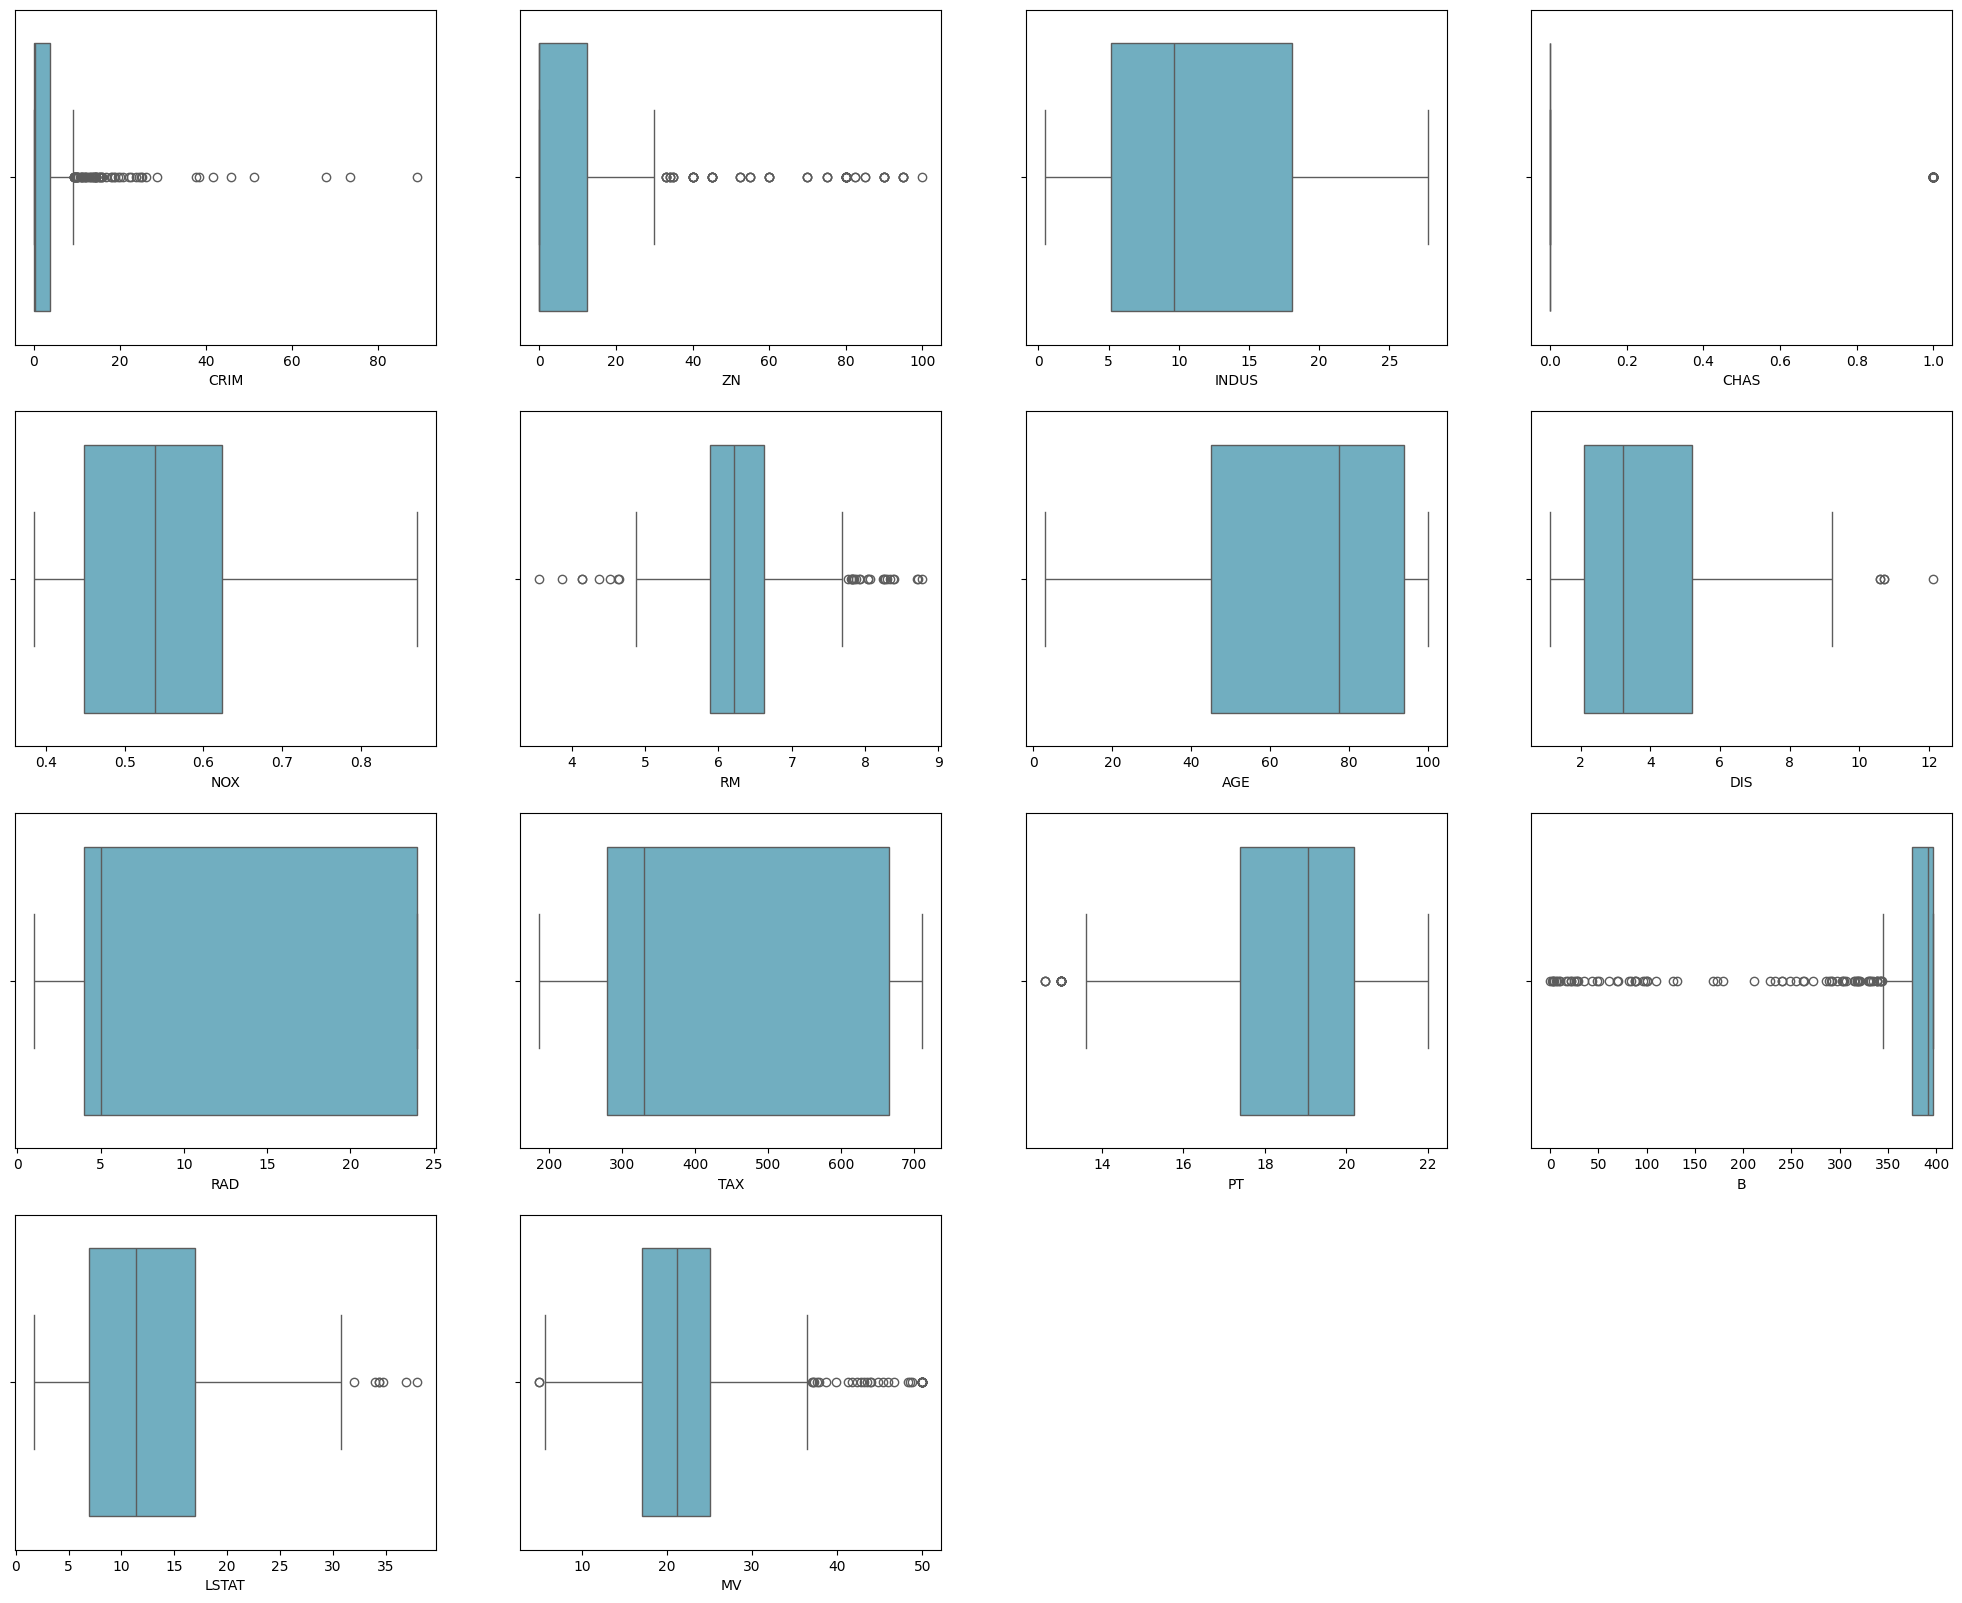

In [30]:
# Structure plots to easily fit the data.
multi_row_plot(sns.boxplot, boston_csv)


Add violin plots to show median, interquartile range, concentration of values.


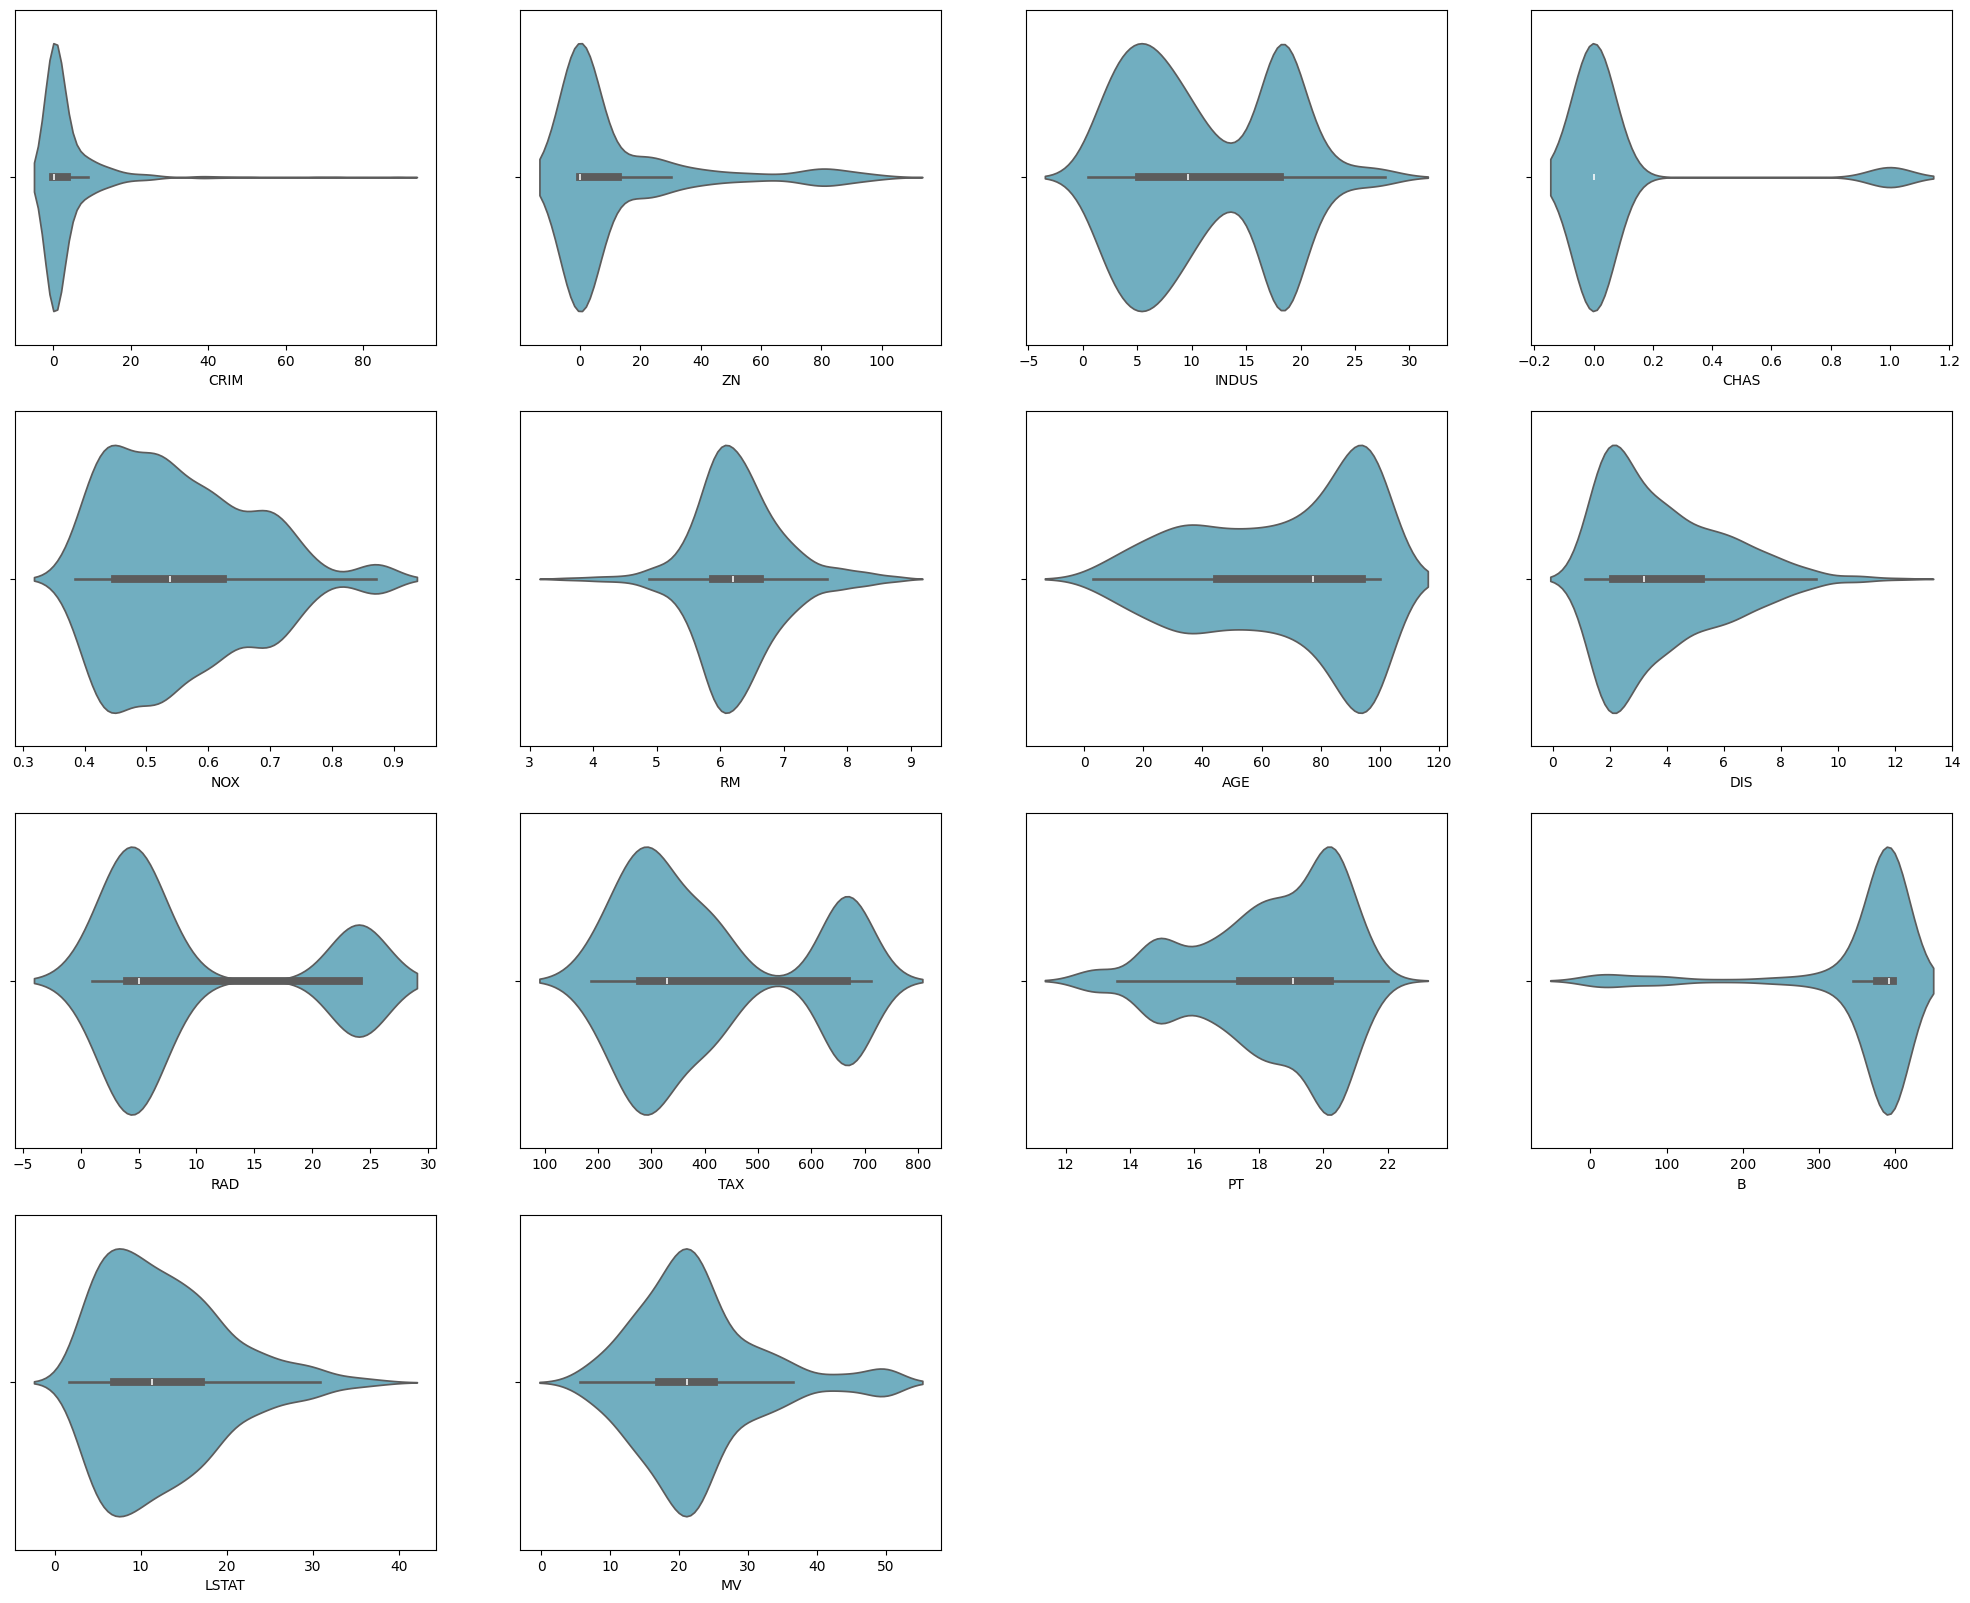

In [31]:
multi_row_plot(sns.violinplot, boston_csv)

Add heatmap for an overview of correlation cooeficients

<Axes: >

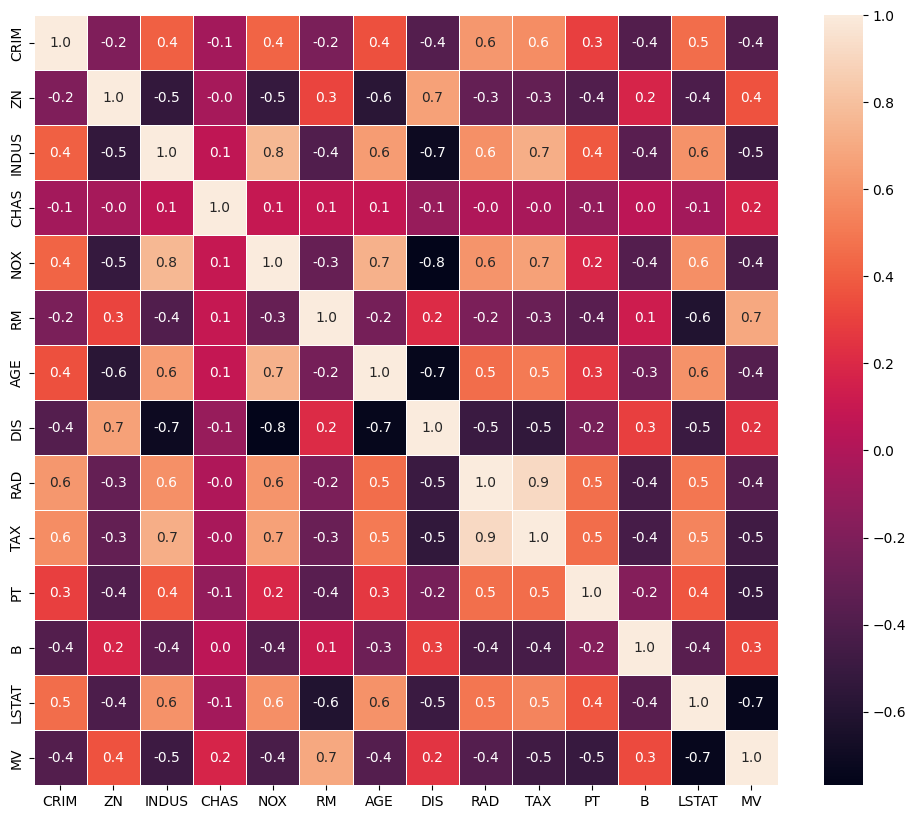

In [ ]:
plt.figure(figsize=(12, 10))

corr_matrix = boston_csv.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidth=0.5)